# Load libraries

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt  # for graphs
# Modules for Model Evaluation
from sklearn.model_selection  import train_test_split # for creating train and test datasets
from sklearn import model_selection 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score  # for cross-validation
from sklearn.metrics import roc_curve, auc
### Modules for supervised ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from datetime import datetime

# import data

In [2]:
# load main DATA 
db_6play_original=pd.read_csv("Base 6play.csv", delimiter=";", decimal=',', 
    dtype={ 2: str, 11: str, 13:str})

In [3]:
#load emission DATA
db_emissions=pd.read_csv("EMISSIONS.csv", delimiter=";", decimal=",", dtype={ 3: str })

In [4]:
db_6play = db_6play_original.copy()
db_6play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824900 entries, 0 to 2824899
Data columns (total 19 columns):
uid                              object
device                           object
age                              object
gender                           object
loginprovider                    object
year                             int64
month                            int64
recence                          int64
rupture                          int64
dureerelation                    float64
frequence_utilisation            int64
completion_rate_moy_mens         object
preroll_rejection_freq           int64
duree_moy_pgms_visionns          object
duree_inter_session              object
conso_par_mois_programme         int64
part_temps_programme_par_mois    object
NBRE_PROG_CONSOMMES              int64
COHORTE                          object
dtypes: float64(1), int64(8), object(10)
memory usage: 409.5+ MB


# convert types

In [5]:
columns_to_numeric = [
'age',
'dureerelation',
'completion_rate_moy_mens',
'duree_moy_pgms_visionns',         
'duree_inter_session',            
'part_temps_programme_par_mois'    
]
    
for column in columns_to_numeric:
    db_6play[column] = pd.to_numeric( db_6play[column], errors='coerce' )
    print("converted ", column, " succesfully!")
                                       

converted  age  succesfully!
converted  dureerelation  succesfully!
converted  completion_rate_moy_mens  succesfully!
converted  duree_moy_pgms_visionns  succesfully!
converted  duree_inter_session  succesfully!
converted  part_temps_programme_par_mois  succesfully!


In [6]:
columns_to_string = [
'uid',
'device',
'gender',
'loginprovider',
'COHORTE',
]
for column in columns_to_string:
    db_6play[column].astype('str')
    print("converted ", column, " succesfully!")


converted  uid  succesfully!
converted  device  succesfully!
converted  gender  succesfully!
converted  loginprovider  succesfully!
converted  COHORTE  succesfully!


In [7]:
db_6play.fillna(0, inplace=True)
#db_6play.head(3)

In [8]:
db_6play = db_6play.sort_values(['uid', 'year','month'])

# We now groupby uid to have the last row and additional data: we count the number of period, the different duree_intee_session

In [9]:
from datetime import datetime
start = datetime.now()
new_data_frame = db_6play[:100000].copy().groupby('uid').last()
print("This took {} sec", datetime.now() - start)

This took {} sec 0:00:14.546073


In [10]:
initial_size = 100000
total_size = len(np.unique(db_6play[:initial_size]['uid'].values))
print(total_size)
print(new_data_frame.shape[0])

32021
32021


In [11]:
db_6play.head(10)

,uid,device,age,gender,loginprovider,year,month,recence,rupture,dureerelation,frequence_utilisation,completion_rate_moy_mens,preroll_rejection_freq,duree_moy_pgms_visionns,duree_inter_session,conso_par_mois_programme,part_temps_programme_par_mois,NBRE_PROG_CONSOMMES,COHORTE
0,00003b73e36d4bc294aaa7bfed444c0e,and,25.0,f,site,2016,12,83,1,725.991638,1,0.0,0,1442.0,0.0,224,100.0,1,DEC2015
1,00003b73e36d4bc294aaa7bfed444c0e,and,25.0,f,site,2017,1,83,1,725.991638,1,100.0,0,62.0,7.0,6893,100.0,1,DEC2015
2,0000723c120e4431a11d1adbc62f5d70,and,44.0,f,site,2016,10,150,1,294.993042,22,0.0,0,0.0,4.0,1,0.0,5,OCT2016
3,0000723c120e4431a11d1adbc62f5d70,and,44.0,f,site,2016,11,150,1,294.993042,1,0.0,1,59.0,1.0,0,0.0,1,OCT2016
4,0000882213654f18a7d642bd5009cc6f,and,45.0,m,site,2016,10,127,1,298.996521,1,0.0,1,72.0,0.0,0,0.0,1,MAI2016
5,0000882213654f18a7d642bd5009cc6f,and,45.0,m,site,2016,11,127,1,298.996521,1,0.0,1,2452.0,51.0,0,0.0,1,MAI2016
6,000098845644408882864e4f394d7b12,web,22.0,f,site,2016,10,0,0,804.992371,46,0.0,0,0.0,1.0,17809,0.0,6,NOV2015
7,000098845644408882864e4f394d7b12,and,22.0,f,site,2016,11,0,0,804.992371,12,0.0,0,0.0,2.0,3798,0.0,4,NOV2015
8,000098845644408882864e4f394d7b12,and,22.0,f,site,2016,12,0,0,804.992371,18,0.0,0,204.0,3.0,8557,0.0,2,NOV2015
9,000098845644408882864e4f394d7b12,web,22.0,f,site,2017,1,0,0,804.992371,5,0.0,0,136.0,17.0,6539,0.0,3,NOV2015


In [12]:
#np.column_stack(( new_data_frame.columns.values, np.arange(len(new_data_frame.columns))))

# remove categorical

In [13]:
# we check the version of pandas
if float(pd.__version__[:4])< 0.22:
    new_data_frame = new_data_frame.drop('COHORTE', axis = 1)
else:
    new_data_frame = new_data_frame.drop( columns=['COHORTE'])

In [14]:
print( 'shape', new_data_frame.shape )
categorical_columns = ['device','gender','loginprovider']
for column in categorical_columns:
    print('\n--- ', column, '\n: ', new_data_frame[column].value_counts())

shape (32021, 17)

---  device 
:  web    15911
and     6853
ipa     4926
iph     4331
Name: device, dtype: int64

---  gender 
:  f    23170
m     8828
u       21
N        2
Name: gender, dtype: int64

---  loginprovider 
:  site          30579
facebook       1251
googleplus      191
Name: loginprovider, dtype: int64


In [15]:
new_data_frame = new_data_frame[ (new_data_frame.gender == 'f') | (new_data_frame.gender == 'm')]
new_data_frame.columns

Index(['device', 'age', 'gender', 'loginprovider', 'year', 'month', 'recence',
       'rupture', 'dureerelation', 'frequence_utilisation',
       'completion_rate_moy_mens', 'preroll_rejection_freq',
       'duree_moy_pgms_visionns', 'duree_inter_session',
       'conso_par_mois_programme', 'part_temps_programme_par_mois',
       'NBRE_PROG_CONSOMMES'],
      dtype='object')

In [16]:
new_data_frame = pd.get_dummies(new_data_frame, prefix= 'gender')
print('done with categorical')
print( new_data_frame.shape )
print( new_data_frame.columns )

done with categorical
(31998, 23)
Index(['age', 'year', 'month', 'recence', 'rupture', 'dureerelation',
       'frequence_utilisation', 'completion_rate_moy_mens',
       'preroll_rejection_freq', 'duree_moy_pgms_visionns',
       'duree_inter_session', 'conso_par_mois_programme',
       'part_temps_programme_par_mois', 'NBRE_PROG_CONSOMMES', 'gender_and',
       'gender_ipa', 'gender_iph', 'gender_web', 'gender_f', 'gender_m',
       'gender_facebook', 'gender_googleplus', 'gender_site'],
      dtype='object')


In [17]:
X = new_data_frame.copy()
columns_to_delete = ['gender_and',  'gender_ipa', 'gender_iph', 'gender_web',
       'gender_facebook', 'gender_googleplus', 'gender_site']
print('before dropping rupture shape', X.shape)
if float(pd.__version__[:4])< 0.22:
    X = X.drop( columns_to_delete,axis=1)
else:
    X = X.drop( columns=columns_to_delete)
print('after dropping rupture shape', X.shape)

before dropping rupture shape (31998, 23)
after dropping rupture shape (31998, 16)


In [18]:
y = new_data_frame['rupture']
y.shape

(31998,)

# train the model

In [19]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22398, 16)
(9600, 16)
(22398,)
(9600,)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold


seed = 42
log_reg = LogisticRegression()
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(log_reg, X_train, y_train, cv=10)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

log_reg.fit(X_train,y_train)

Results: 1.00 (0.00) MSE


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_test,y_pred ), ' we got a score of 99%, this is very good')

0.9998958333333333  we got a score of 99%, this is very good


In [23]:
# do a random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
y_pred2 = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred2 ), ' we got a score of 99%, this is very good')

1.0  we got a score of 99%, this is very good


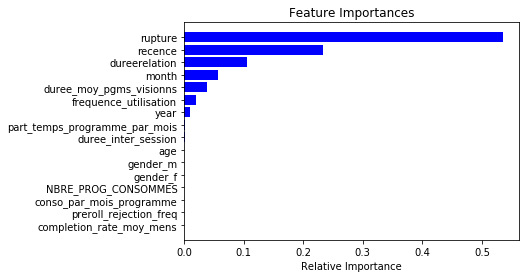

In [25]:
features = X.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()


In [26]:
#keras expects model inputs to be numpy arrays - not pandas.DataFrames. 
X_train=X_train.as_matrix()
y_train=y_train.as_matrix()
X_test=X_test.as_matrix()
y_test=y_test.as_matrix()
#As as_matrix method converts pandas.DataFrame to a numpy.array.

In [27]:
from keras.layers import Dense
from keras.models import load_model
model = load_model("deep_network.HDF5")
model.fit(X_train, y_train, epochs=30, batch_size=20, verbose=2)
print(model.summary())


# the 'deep_network.HDF5' model was obtained as follows
# from keras.models import Sequential
# from keras.layers import Dense
# model = Sequential()
# model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(30, activation='relu'))
# model.add(Dense(30, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
# we change the optimizer from adam to RMSprop to avoid local minima


Using TensorFlow backend.


Epoch 1/30
 - 1s - loss: 0.2260 - acc: 0.9778
Epoch 2/30
 - 1s - loss: 0.2072 - acc: 0.9800
Epoch 3/30
 - 1s - loss: 0.1839 - acc: 0.9824
Epoch 4/30
 - 1s - loss: 0.1534 - acc: 0.9834
Epoch 5/30
 - 1s - loss: 0.1384 - acc: 0.9846
Epoch 6/30
 - 1s - loss: 0.1341 - acc: 0.9858
Epoch 7/30
 - 1s - loss: 0.1131 - acc: 0.9876
Epoch 8/30
 - 1s - loss: 0.0832 - acc: 0.9905
Epoch 9/30
 - 1s - loss: 0.0973 - acc: 0.9897
Epoch 10/30
 - 1s - loss: 0.0897 - acc: 0.9890
Epoch 11/30
 - 1s - loss: 0.0889 - acc: 0.9906
Epoch 12/30
 - 1s - loss: 0.0593 - acc: 0.9930
Epoch 13/30
 - 1s - loss: 0.0740 - acc: 0.9912
Epoch 14/30
 - 1s - loss: 0.0579 - acc: 0.9933
Epoch 15/30
 - 1s - loss: 0.0623 - acc: 0.9933
Epoch 16/30
 - 1s - loss: 0.0651 - acc: 0.9927
Epoch 17/30
 - 1s - loss: 0.0471 - acc: 0.9938
Epoch 18/30
 - 1s - loss: 0.0440 - acc: 0.9942
Epoch 19/30
 - 1s - loss: 0.0537 - acc: 0.9933
Epoch 20/30
 - 1s - loss: 0.0489 - acc: 0.9952
Epoch 21/30
 - 1s - loss: 0.0493 - acc: 0.9941
Epoch 22/30
 - 1s - lo

In [28]:
# summarize performance of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))

Model Accuracy: 98.51%


In [29]:
model.fit(X_train, y_train)
prediction = model.predict(X_test)

Epoch 1/1
22398/22398 [==============================] - 1s 27us/step - loss: 0.0222 - acc: 0.9975

In [30]:
accuracy_score(y_test, prediction.round(), normalize=False)

9593

In [31]:
model.predict_proba(X_test).shape

(9600, 1)

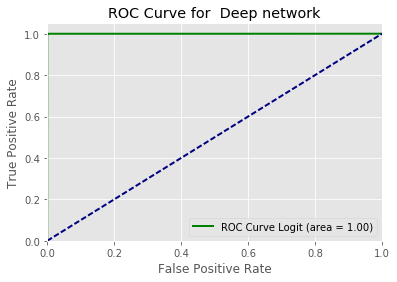

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

def plot_roc_curve(my_model, index, modelname = ""):
    y_predict_probabilities = my_model.predict_proba(X_test)[:,index]
    fpr_, tpr_, _ = roc_curve(y_test, y_predict_probabilities)
    roc_auc_ = auc(fpr_, tpr_)

    plt.figure()
    plt.plot(fpr_, tpr_, color='green',
             lw=2, label='ROC Curve Logit (area = %0.2f)' % roc_auc_)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    if modelname == "":
        modelname = str(type(my_model)).split('.')[-1][:-2]
    plt.title('ROC Curve for ' + modelname )
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(model,0, ' Deep network')

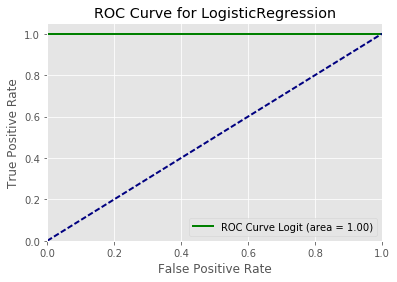

In [33]:
plot_roc_curve(log_reg, 1)

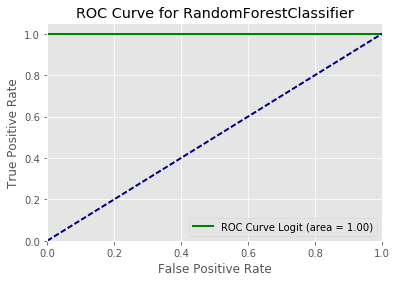

In [34]:
plot_roc_curve(rfc, 1)

# some statistics on emissions

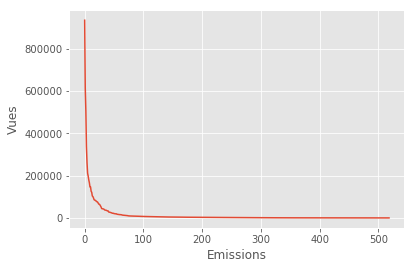

In [35]:
a=db_emissions['prgm_title'].value_counts()
len(a)
b=np.arange(0,len(a))
a
plt.plot(b,a)
plt.xlabel('Emissions')
plt.ylabel('Vues')
plt.show()

def part_de_marche(n):
    b=0
    for i in range(n):
        b+=a[i]
    #print('pourcentage de vues avec ',n, 'emissions : ',b/sum(a))
    return(b)


def plot_part_marche(p):
    
    aa=np.arange(0,p)
    m=0
    for i in range(p):
        aa[m]= part_de_marche(i)
        m+=1
    plt.plot(np.arange(0,p),aa/sum(a), color='b')
    plt.axhline(y=0.9, color='r', linestyle='-')
    plt.show()

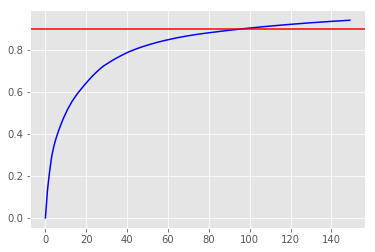

In [36]:
plot_part_marche(150)